In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

strengthOfSchedule = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/1999.csv', index_col=0)
strengthOfSchedule.index = strengthOfSchedule.index.rename('Team')
#print(strengthOfSchedule.head())

weeklyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week1.csv')
#print(weeklyStats.head())

yearlyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
#print(yearlyStats.head())

In [2]:
weekYearDf = pd.DataFrame()
tempYearDf = pd.DataFrame()
for years in range(1999, 2020):
    for weeks in range(1, 16):
        readFile = ("https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/" + str(years) + "/week" + str(weeks) + ".csv")
        weeklyDf = pd.read_csv(readFile)
        weeklyDf.drop(['Int', 'PassingAtt', 'Cmp', 'RushingAtt', 'PassingTD',
                          'RushingTD', 'Rec', 'Tgt', 'ReceivingTD', 'FL',
                          'PPRFantasyPoints', 'HalfPPRFantasyPoints'], axis = 1, inplace=True)

        weeklyDf['Week'] = weeks
        tempYearDf = pd.concat([tempYearDf,weeklyDf])
        
    tempYearDf['Year'] = years
    weekYearDf = pd.concat([weekYearDf,tempYearDf])

#print(weekYearDf.tail())

QB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'QB']
#print(weekYearDf['Year'])

RB_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'RB']
#print(RB_weekYearDf.head())

WR_weekYearDf = weekYearDf.loc[weekYearDf['Pos'] == 'WR']
#print(WR_weekYearDf.head())

Text(0, 0.5, 'Annual Fantasy Points')

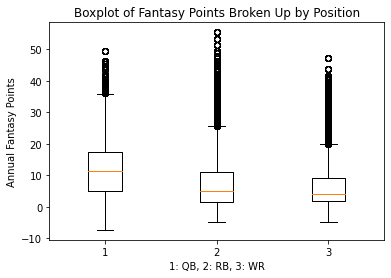

In [3]:
plt.boxplot([QB_weekYearDf['StandardFantasyPoints'],RB_weekYearDf['StandardFantasyPoints'], WR_weekYearDf['StandardFantasyPoints']])
plt.title('Boxplot of Fantasy Points Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Fantasy Points')

Text(0, 0.5, 'Annual Yards')

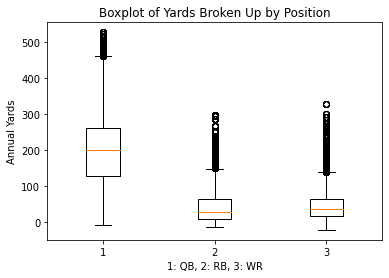

In [4]:
plt.boxplot([QB_weekYearDf['PassingYds'],RB_weekYearDf['RushingYds'], WR_weekYearDf['ReceivingYds']])
plt.title('Boxplot of Yards Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Yards')

Text(0, 0.5, 'Number of Players in Each Bucket')

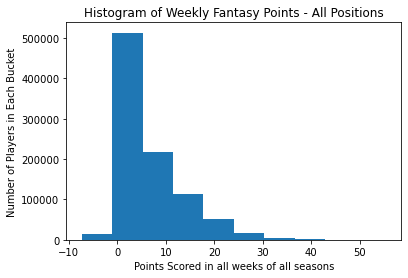

In [5]:
plt.hist(weekYearDf['StandardFantasyPoints'])
plt.title('Histogram of Weekly Fantasy Points - All Positions')
plt.xlabel('Points Scored in all weeks of all seasons')
plt.ylabel('Number of Players in Each Bucket')

In [8]:
meanTempDf = pd.DataFrame()
QBweekList = []
RBweekList = []
WRweekList = []
for weeks in range(1, 16):
    tempQBDf = QB_weekYearDf.loc[QB_weekYearDf['Week'] == weeks]
    tempRBDf = RB_weekYearDf.loc[RB_weekYearDf['Week'] == weeks]
    tempWRDf = WR_weekYearDf.loc[WR_weekYearDf['Week'] == weeks]

    QBweekList.append(tempQBDf['StandardFantasyPoints'].mean())
    RBweekList.append(tempRBDf['StandardFantasyPoints'].mean())
    WRweekList.append(tempWRDf['StandardFantasyPoints'].mean())
    
    found = QB_weekYearDf[QB_weekYearDf['Week'] == weeks].index.tolist()
    print(len(found))
    
meanTempDf['QB'] = QBweekList
meanTempDf['RB'] = RBweekList
meanTempDf['WR'] = WRweekList
print(meanTempDf)

8527
8612
8106
8029
7565
7388
7929
7859
7528
7867
8331
8637
8751
8842
8799
           QB        RB        WR
0   11.578222  7.138207  6.136174
1   11.805128  6.883627  6.187909
2   11.770950  7.437526  6.096694
3   11.466763  7.408033  6.128831
4   12.396645  7.157606  6.420054
5   11.872049  7.239972  6.099072
6   11.061682  7.627635  5.997653
7   11.487808  7.535008  6.159250
8   11.710005  7.736382  6.052533
9   11.931710  7.414562  6.287276
10  11.739625  7.321265  6.006437
11  11.900014  7.381908  6.205992
12  11.441339  7.712871  6.108728
13  11.047921  7.726399  5.855054
14  11.420077  7.872734  6.124945


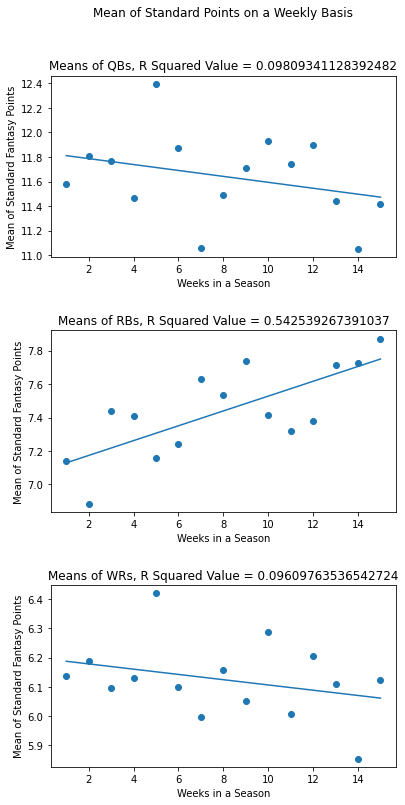

QBs R Squared Value =  0.09809341128392482
RBs R Squared Value =  0.542539267391037
WRs R Squared Value =  0.09609763536542724


In [9]:
QBslope, QBintercept, QBr, QBp, QBstd_err = stats.linregress((meanTempDf.index+1), meanTempDf['QB'])
QBr2 = QBr**2
def myfuncQB(x):
  return (QBslope * x + QBintercept)
QBmodel = list(map(myfuncQB, meanTempDf.index+1))
RBslope, RBintercept, RBr, RBp, RBstd_err = stats.linregress((meanTempDf.index+1), meanTempDf['RB'])
RBr2 = RBr**2
def myfuncRB(x):
  return (RBslope * x + RBintercept)
RBmodel = list(map(myfuncRB, meanTempDf.index+1))

WRslope, WRintercept, WRr, WRp, WRstd_err = stats.linregress((meanTempDf.index+1), meanTempDf['WR'])
WRr2 = WRr**2
def myfuncWR(x):
  return (WRslope * x + WRintercept)
WRmodel = list(map(myfuncWR, meanTempDf.index+1))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (6,12))
fig.suptitle('Mean of Standard Points on a Weekly Basis')

ax1.scatter((meanTempDf.index+1), meanTempDf['QB'])
ax1.plot((meanTempDf.index+1), QBmodel)
ax1.set_title('Means of QBs, R Squared Value = ' + str(QBr**2))
ax1.set_xlabel('Weeks in a Season')
ax1.set_ylabel('Mean of Standard Fantasy Points')

ax2.scatter((meanTempDf.index+1), meanTempDf['RB'])
ax2.plot((meanTempDf.index+1), RBmodel)
ax2.set_title('Means of RBs, R Squared Value = ' + str(RBr**2))
ax2.set_xlabel('Weeks in a Season')
ax2.set_ylabel('Mean of Standard Fantasy Points')

ax3.scatter((meanTempDf.index+1), meanTempDf['WR'])
ax3.plot((meanTempDf.index+1), WRmodel)
ax3.set_title('Means of WRs, R Squared Value = ' + str(WRr**2))
ax3.set_xlabel('Weeks in a Season')
ax3.set_ylabel('Mean of Standard Fantasy Points')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()
print("QBs R Squared Value = " , QBr**2)
print("RBs R Squared Value = ", RBr**2)
print("WRs R Squared Value = ", WRr**2)